<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/ML%20course%20with%20Python/Building_Learnear_Regression_Model_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
class Linear_regression():

  #initiate the parameters
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  def fit(self, x, y):
    #number of training sample(m) and number of features(m)
    self.m, self.n= x.shape
    #initialize the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.x = x
    self.y = y
    #implement Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  #update weight in gradient descent
  def update_weights(self ):
    y_prediction = self.predict(self.x)
    #calculate gradients
    dw = -(2 * (self.x.T).dot(self.y - y_prediction)) / self.m
    db = -2 * np.sum(self.y - y_prediction) / self.m
    #update weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self, x):
    return x.dot(self.w) + self.b

In [6]:
#Using Linear Regression model

#load dataset
salary_data = pd.read_csv("/content/salary_data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
salary_data.shape

(30, 2)

In [8]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
#separate the features and target
x = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, 1].values
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [11]:
#split training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(30, 1) (21, 1) (9, 1)


In [26]:
#train the model
model = Linear_regression(learning_rate=0.02, no_of_iterations=1000)
model.fit(x_train, y_train)

In [23]:
#print the weight and bias parameter values
print("weight is: ", model.w[0])
print("bias is: ", model.b)

weight is:  9532.83553603681
bias is:  23750.93556359476


In [24]:
#predict salary for test data
test_data_prediction = model.predict(x_test)
print(test_data_prediction)

[ 36143.62176044  34237.05465324  66648.69547576  59022.42704693
  91434.06786946  80947.94877982 101920.1869591   52349.44217171
  42816.60663567]


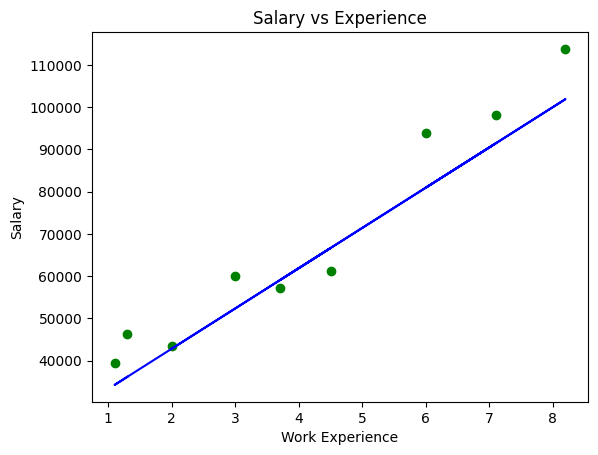

In [25]:
#plot the actual and predicted values
plt.scatter(x_test, y_test, color="green")
plt.plot(x_test, test_data_prediction, color="blue")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()